In [1]:
import pandas as pd
df=pd.read_csv("/content/fashion_products.csv")
print("Head:")
print(df.head())
print("Tail:")
print(df.tail())
print("\n Describe:")
print(df.describe())
print("\n Info:")
print(df.info())
print("\n Shape:")
print(df.shape)
print("\n Dtype:")
print(df.dtypes)
print("\n Value Counts:")
print(df['Product Name'].value_counts())



Head:
   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  
Tail:
     User ID  Product ID Product Name   Brand         Category  Price  \
995       20         996        Shoes    Zara  Women's Fashion     55   
996       42         997      Sweater    Nike    Kids' Fashion     13   
997        9         998      Sweater    Zara    Men's Fashion     47   
998        8         999      T-shirt    Zara  Women's Fashion     68   
999       91        1000        Sh

In [2]:
df=df.drop_duplicates()
print("DataFrame after dropping duplicates:")
print(df)
null_counts = df.isnull().sum()
print("Null counts per column:")
print(null_counts)

DataFrame after dropping duplicates:
     User ID  Product ID Product Name   Brand         Category  Price  \
0         19           1        Dress  Adidas    Men's Fashion     40   
1         97           2        Shoes     H&M  Women's Fashion     82   
2         25           3        Dress  Adidas  Women's Fashion     44   
3         57           4        Shoes    Zara    Men's Fashion     23   
4         79           5      T-shirt  Adidas    Men's Fashion     79   
..       ...         ...          ...     ...              ...    ...   
995       20         996        Shoes    Zara  Women's Fashion     55   
996       42         997      Sweater    Nike    Kids' Fashion     13   
997        9         998      Sweater    Zara    Men's Fashion     47   
998        8         999      T-shirt    Zara  Women's Fashion     68   
999       91        1000        Shoes  Adidas  Women's Fashion     79   

       Rating   Color Size  
0    1.043159   Black   XL  
1    4.026416   Black    L  

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to be encoded
columns_to_encode = [ 'Brand', 'Category', 'Color', 'Size']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))



In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_columns = ['User ID','Price','Rating']

# Select numerical columns from the original DataFrame
df_numerical = df[numerical_columns].reset_index(drop=True)

# Combine the numerical and one-hot encoded DataFrames
df_combined = pd.concat([df_numerical, encoded_df], axis=1)

# Apply MinMaxScaler to the numerical columns
df_scaled_minmax = MinMaxScaler().fit_transform(df_numerical)
print("\n DataFrame after MinMaxScaler on numerical columns:")
print(df_scaled_minmax)

# Apply StandardScaler to the numerical columns
df_scaled_standard = StandardScaler().fit_transform(df_numerical)
print("\n DataFrame after StandardScaler on numerical columns:")
print(df_scaled_standard)



 DataFrame after MinMaxScaler on numerical columns:
[[0.18181818 0.33333333 0.01058239]
 [0.96969697 0.8        0.75882901]
 [0.24242424 0.37777778 0.58614799]
 ...
 [0.08080808 0.41111111 0.74265062]
 [0.07070707 0.64444444 0.5238916 ]
 [0.90909091 0.76666667 0.52485259]]

 DataFrame after StandardScaler on numerical columns:
[[-1.09219217 -0.6006789  -1.69179348]
 [ 1.61925597  0.99757981  0.89647177]
 [-0.88361923 -0.44846378  0.29914962]
 ...
 [-1.43981372 -0.33430245  0.84050898]
 [-1.47457588  0.46482691  0.08379809]
 [ 1.41068304  0.88341847  0.08712227]]


In [5]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
print("\n Interquartile Range for Numerical Columns:")
print(IQR)


 Interquartile Range for Numerical Columns:
User ID    49.000000
Price      45.250000
Rating      1.992298
dtype: float64


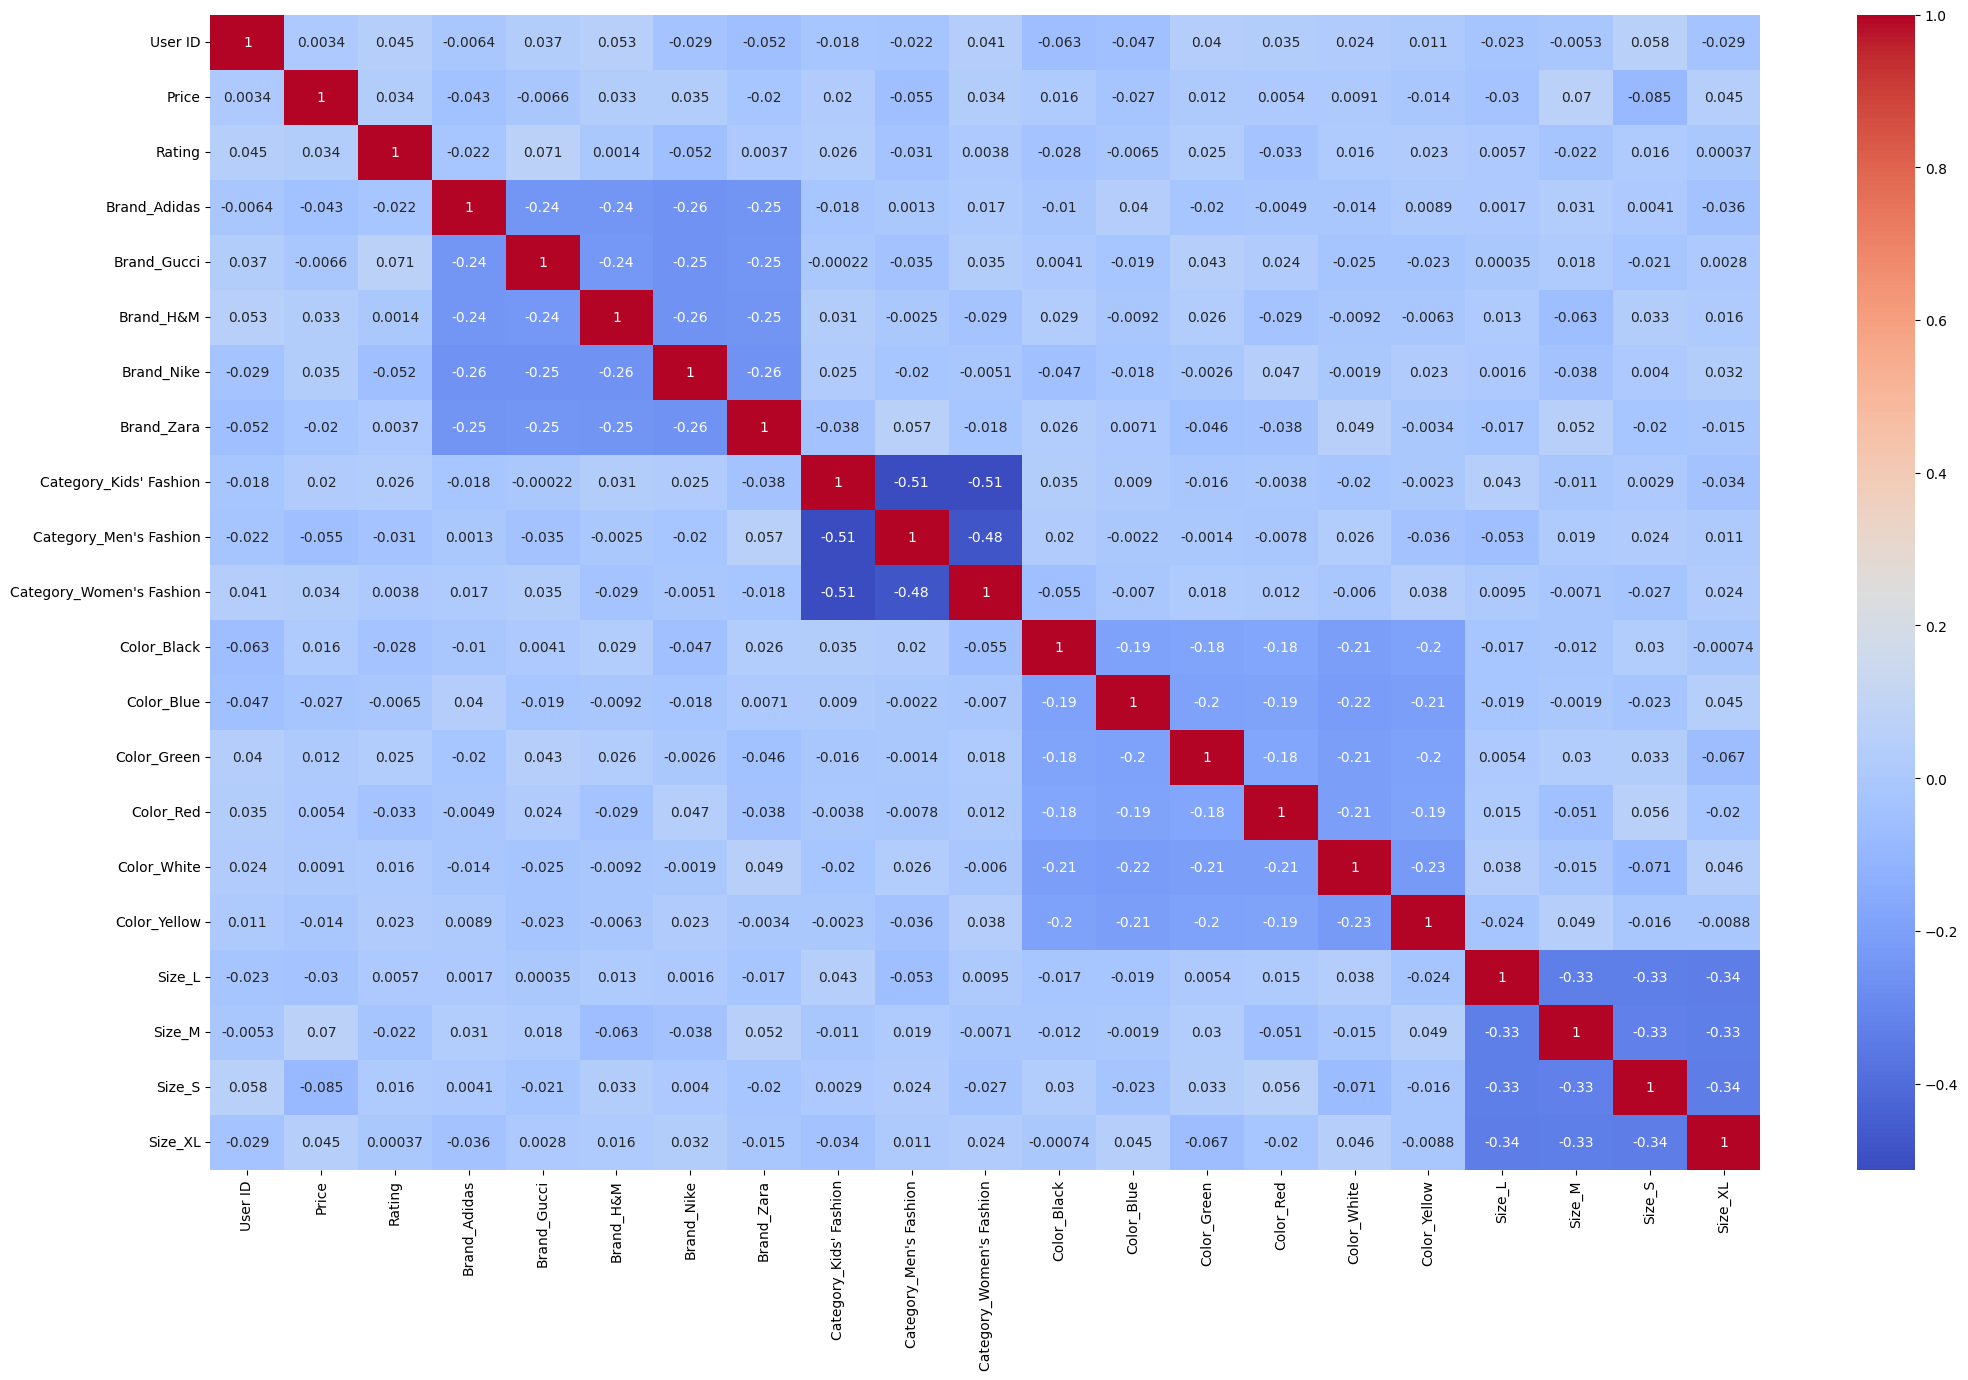

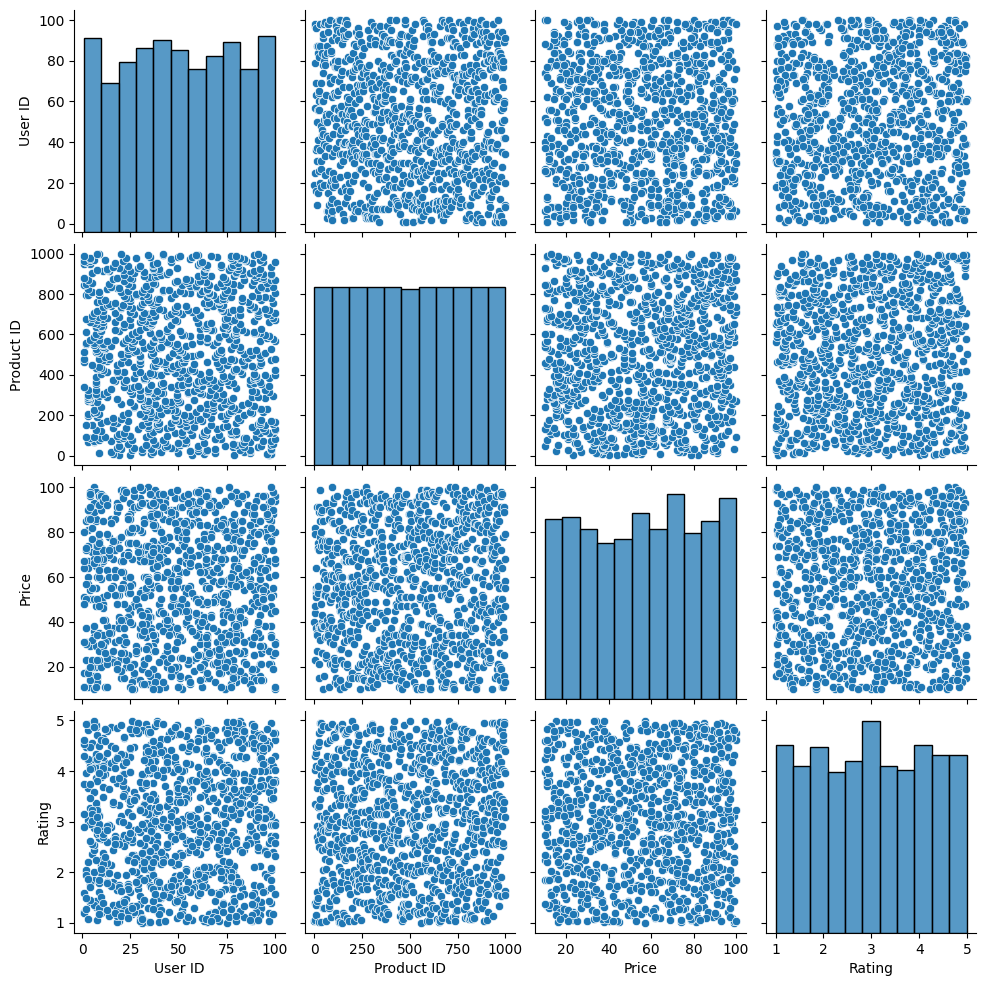

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_combined.corr()

# Plot the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True , cmap='coolwarm')
plt.show()
sns.pairplot(df)
plt.show()

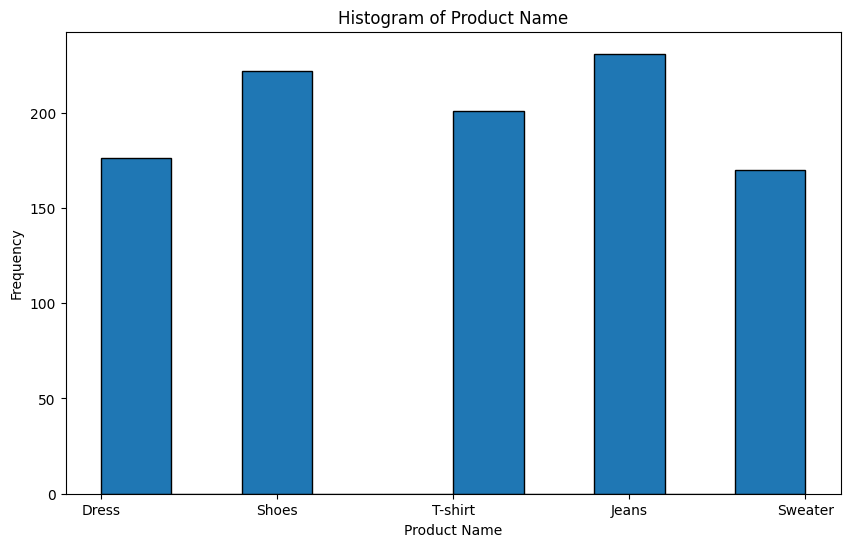

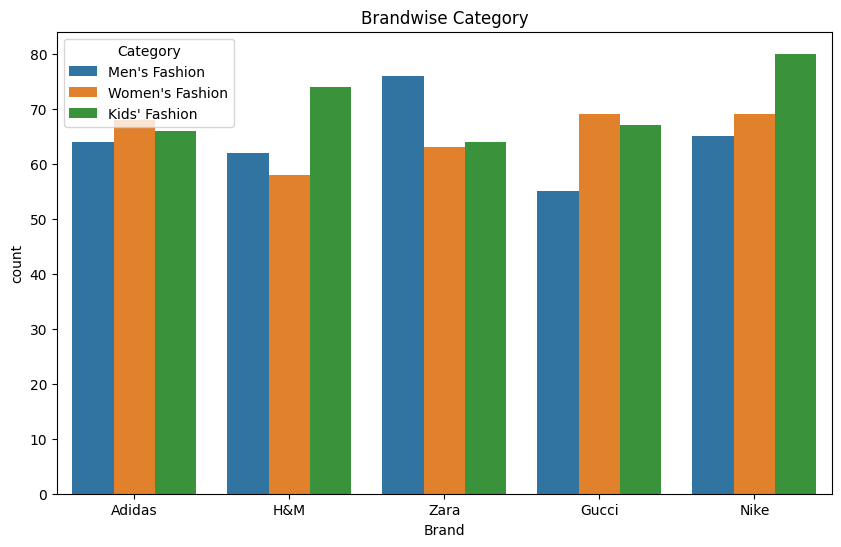

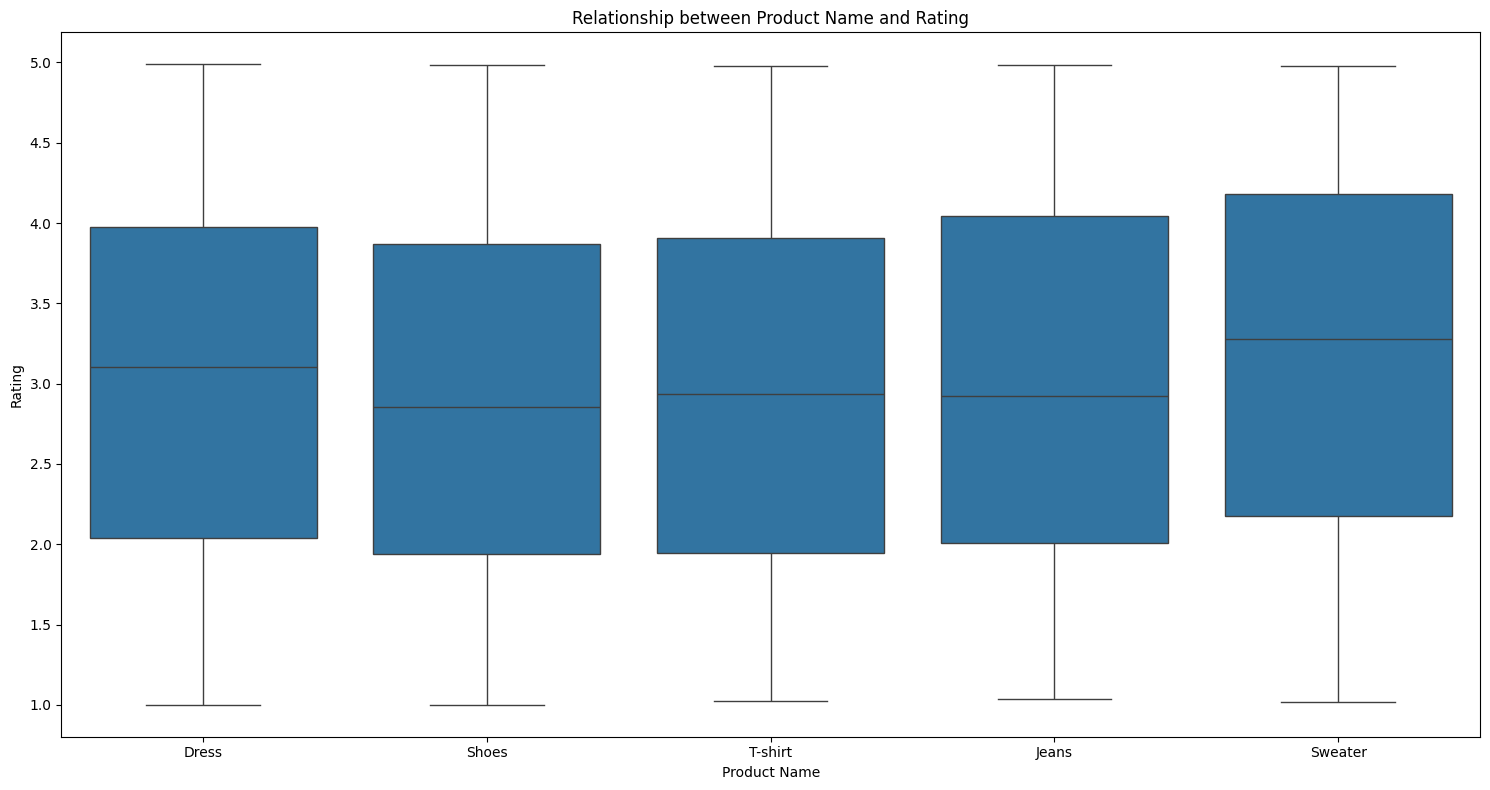

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['Product Name'], bins=10, edgecolor='black')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Histogram of Product Name')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Brand', hue='Category', data=df)
plt.title('Brandwise Category')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Product Name', y='Rating', data=df)
plt.title('Relationship between Product Name and Rating')
plt.xlabel('Product Name')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

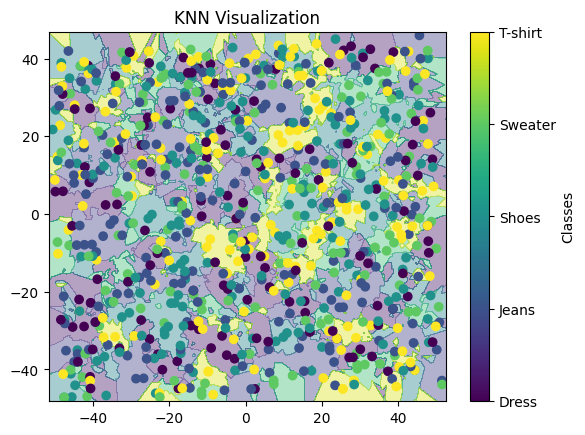

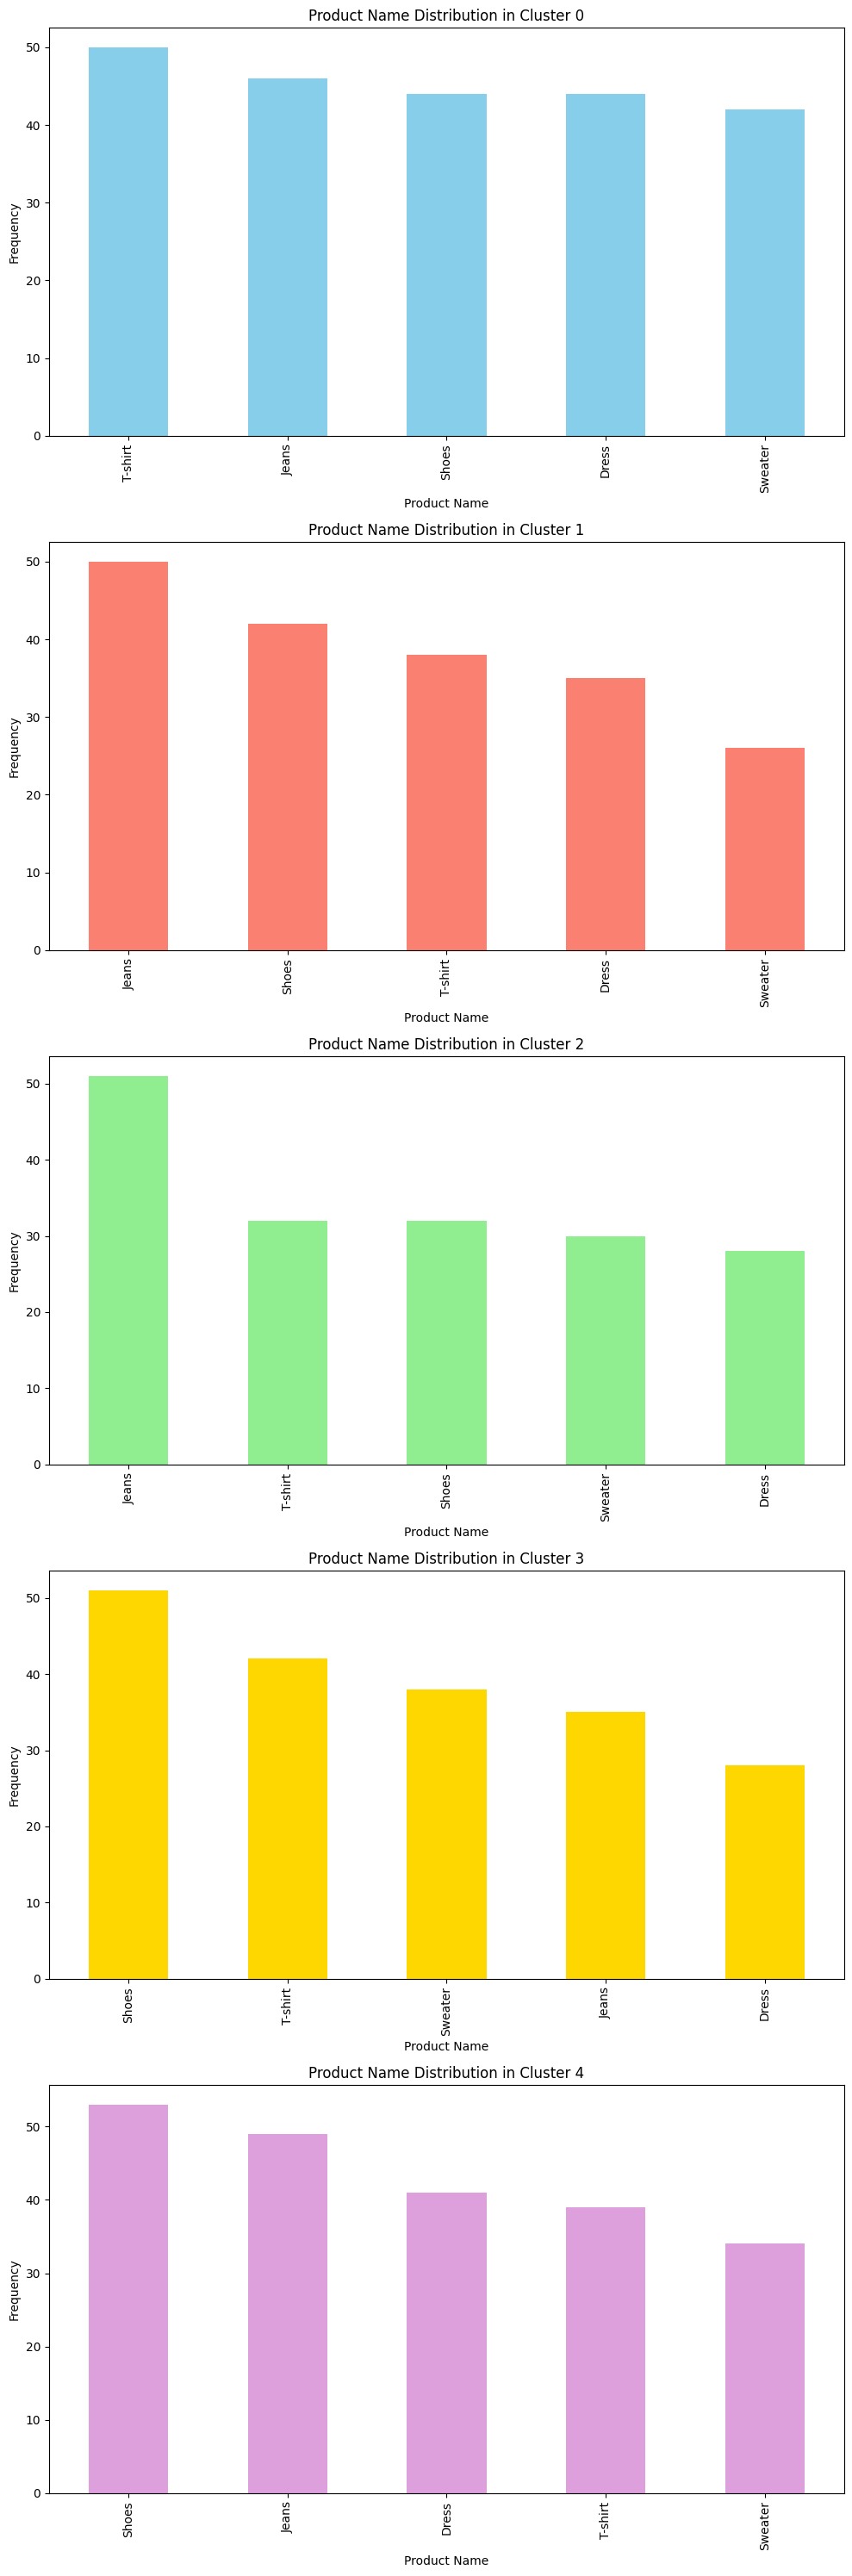

In [8]:
#Import necessary libraries

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


#Split the data into training and testing sets
X = df_combined.drop(['Product Name'], axis=1, errors='ignore')
y = df['Product Name']

# Apply Label Encoding to the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

#Train the KNN classifier on the encoded labels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train_encoded)

#Make predictions
y_pred = knn.predict(x_test)

# Reduce the dimensionality to 2 using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

#Visualize the KNN classification

x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Train the visualization KNN with the encoded labels
knn_pca_viz = KNeighborsClassifier(n_neighbors=5)
knn_pca_viz.fit(x_train_pca, y_train_encoded)


# Make predictions on the meshgrid using the visualization KNN
Z = knn_pca_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_encoded, cmap='viridis')

plt.title("KNN Visualization")

cbar = plt.colorbar(label='Classes')
cbar.set_ticks(np.arange(5))
cbar.set_ticklabels(label_encoder.classes_)
plt.show()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Kmeans= KMeans(n_clusters=5, random_state=42)
Labels = Kmeans.fit_predict(df_combined)

# Add the cluster labels to the original DataFrame
df['Cluster'] = Labels
cluster_colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'plum']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
for i in range(5):
  cluster_df = df[df['Cluster'] == i]

  product_name_counts = cluster_df['Product Name'].value_counts()
  product_name_counts.plot(kind='bar', ax=axes[i],color=cluster_colors[i])
  axes[i].set_title(f'Product Name Distribution in Cluster {i}')
  axes[i].set_xlabel('Product Name')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

import pickle
file= 'knn.pkl'
pickle.dump(knn,open(file,'wb'))



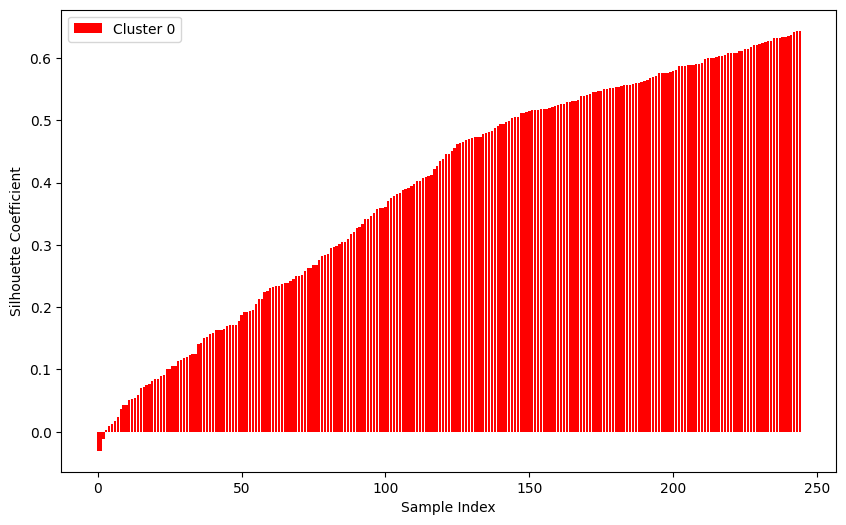

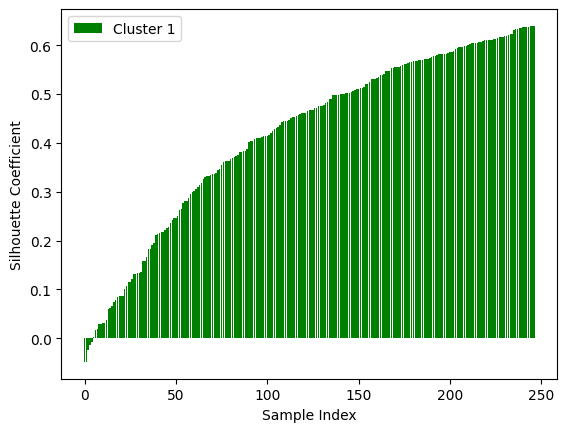

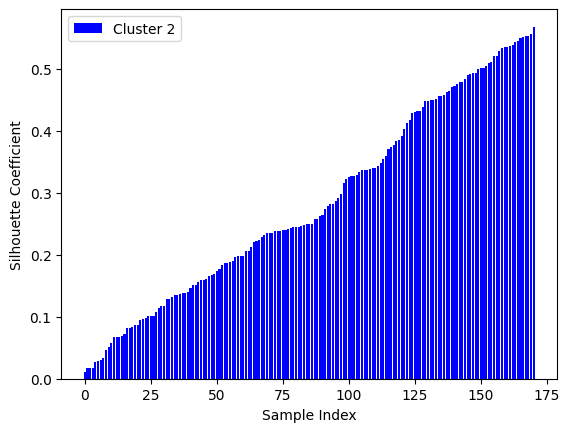

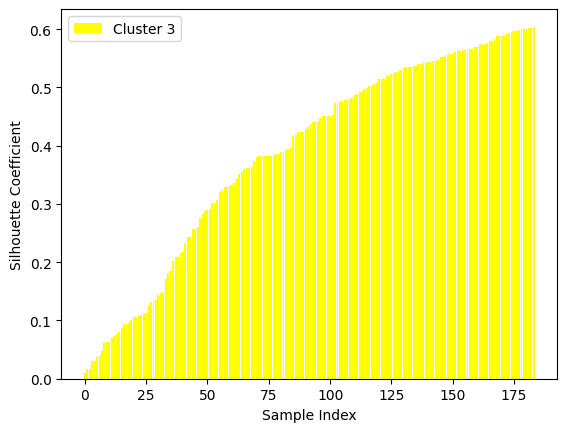

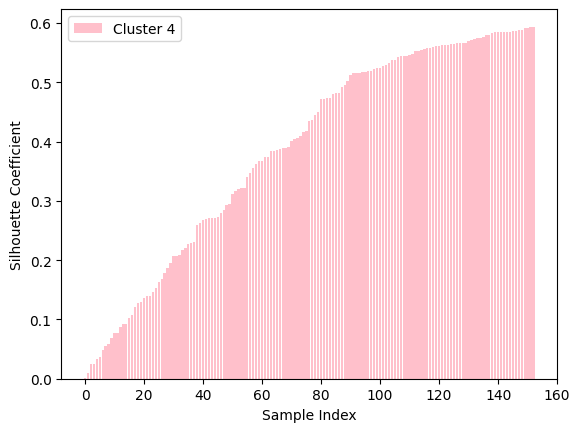

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

Kmeans= KMeans(n_clusters=5)
Labels = Kmeans.fit_predict(df_combined)
silhouette_values=silhouette_samples(df_combined,Labels)
colours=['red','green','blue','yellow','pink']
plt.figure(figsize = (10,6))


for i in range (5):
  cluster_values = [silhouette_values[j] for j in range(len(silhouette_values)) if Labels[j] == i]
  cluster_values.sort()
  plt.bar(range(len(cluster_values)), cluster_values, label=f'Cluster {i}', color=colours[i])
  plt.legend()
  plt.xlabel('Sample Index')
  plt.ylabel('Silhouette Coefficient')
  plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import distance

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
Labels = kmeans.fit_predict(df_combined)

metrics = ['euclidean', 'cosine', 'correlation']
silhouette_scores = {}

for metric in metrics:
    distance_matrix = distance.cdist(df_combined, df_combined, metric=metric)
    silhouette_avg = silhouette_score(distance_matrix, Labels, metric='precomputed')
    silhouette_scores[metric] = silhouette_avg

best_metric = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best Distance metric: {best_metric}")
print(f"Silhouette Scores: {silhouette_scores}")

Best Distance metric: euclidean
Silhouette Scores: {'euclidean': np.float64(0.37773203783244447), 'cosine': np.float64(0.20643549454356952), 'correlation': np.float64(0.2061007041269613)}


In [11]:
df['Product Name']=df['Product Name'].astype(str)
df['Brand']=df['Brand'].astype(str)
df['Category']=df['Category'].astype(str)
df['Color']=df['Color'].astype(str)
df['Size']=df['Size'].astype(str)
print(df)
print(df.dtypes)

     User ID  Product ID Product Name   Brand         Category  Price  \
0         19           1        Dress  Adidas    Men's Fashion     40   
1         97           2        Shoes     H&M  Women's Fashion     82   
2         25           3        Dress  Adidas  Women's Fashion     44   
3         57           4        Shoes    Zara    Men's Fashion     23   
4         79           5      T-shirt  Adidas    Men's Fashion     79   
..       ...         ...          ...     ...              ...    ...   
995       20         996        Shoes    Zara  Women's Fashion     55   
996       42         997      Sweater    Nike    Kids' Fashion     13   
997        9         998      Sweater    Zara    Men's Fashion     47   
998        8         999      T-shirt    Zara  Women's Fashion     68   
999       91        1000        Shoes  Adidas  Women's Fashion     79   

       Rating   Color Size  Cluster  
0    1.043159   Black   XL        4  
1    4.026416   Black    L        3  
2    3.33

In [12]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [13]:
!npm install -g localtunnel -U

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 4s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [28]:
%%writefile Model2_Dep_app.py
import pandas as pd
import pickle
import streamlit as st
import warnings
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

warnings.filterwarnings('ignore')

st.title('Fashion Recommendation Engine')

df = pd.read_csv("fashion_products.csv")

# Data preprocessing steps from the notebook that are necessary for the app
df['Product Name']=df['Product Name'].astype(str)
df['Brand']=df['Brand'].astype(str)
df['Category']=df['Category'].astype(str)
df['Color']=df['Color'].astype(str)
df['Size']=df['Size'].astype(str)

# Prepare data for recommendations (pivot table and distances)
df1 = df.pivot_table(index='Product Name', columns='User ID', values='Rating')
df1.fillna(0, axis=1, inplace=True)
arr = euclidean_distances(df1)

similarities=pd.DataFrame(arr)


# Define the recommendation function
def recommend_products(Product_Name):
  if Product_Name in df1.index:
    index = df1.index.get_loc(Product_Name)
    similar_product_indices = arr[index].argsort()[1:6]
    st.subheader(f'Recommended products for {Product_Name}:')
    st.text('-' * 25)

    recommended_products_names = [df1.index[i] for i in similar_product_indices]
    for product_name in recommended_products_names:
        st.write(f"- {product_name}")

  else:
    st.write(f'"{Product_Name}" is not in the list of products with rating data.')


def user_input_parameters():
    product_name_options = df['Product Name'].unique()
    brand_options = df['Brand'].unique()
    category_options = df['Category'].unique()
    color_options = df['Color'].unique()
    size_options = df['Size'].unique()


    Product_Name = st.sidebar.selectbox("Select Product Name:", product_name_options)
    Brand = st.sidebar.selectbox("Select Brand:", brand_options)
    Category = st.sidebar.selectbox("Select Category:", category_options)
    Color = st.sidebar.selectbox("Select Color:", color_options)
    Size = st.sidebar.selectbox("Select Size:", size_options)

    # Create a dictionary with the input data
    data = {
        "Product Name": Product_Name,
        "Brand": Brand,
        "Category": Category,
        "Color": Color,
        "Size": Size,

    }
    # Convert the dictionary to a pandas DataFrame
    features = pd.DataFrame(data, index=[0])
    return features

# Get user input
input_features = user_input_parameters()

# Display the user input
st.subheader('User Input:')
st.write(input_features)

# Trigger recommendation based on the selected Product Name
if st.button('Get Recommendations'):
    recommend_products(input_features.iloc[0]['Product Name'])

Overwriting Model2_Dep_app.py


In [29]:
# Install Pillow if you haven't already
!pip install Pillow

# Import necessary libraries
from PIL import Image, ImageDraw

for index, row in df.iterrows():
    img = Image.new('RGB', (400, 200), color='white')
    draw = ImageDraw.Draw(img)

    text = f"Product Name:{row['Product Name']} \n Size:{row['Size']} \n Category:{row['Category']} \n Brand:{row['Brand']}  \n Color:{row['Color']}"
    draw.text((10, 10), text, fill='black')

    # Save the image
    img.save(f'image_{index}.png')

    print(f"Generated image_row_{index}.png")

Generated image_row_0.png
Generated image_row_1.png
Generated image_row_2.png
Generated image_row_3.png
Generated image_row_4.png
Generated image_row_5.png
Generated image_row_6.png
Generated image_row_7.png
Generated image_row_8.png
Generated image_row_9.png
Generated image_row_10.png
Generated image_row_11.png
Generated image_row_12.png
Generated image_row_13.png
Generated image_row_14.png
Generated image_row_15.png
Generated image_row_16.png
Generated image_row_17.png
Generated image_row_18.png
Generated image_row_19.png
Generated image_row_20.png
Generated image_row_21.png
Generated image_row_22.png
Generated image_row_23.png
Generated image_row_24.png
Generated image_row_25.png
Generated image_row_26.png
Generated image_row_27.png
Generated image_row_28.png
Generated image_row_29.png
Generated image_row_30.png
Generated image_row_31.png
Generated image_row_32.png
Generated image_row_33.png
Generated image_row_34.png
Generated image_row_35.png
Generated image_row_36.png
Generated i

In [57]:
%%writefile Model2_Dep_app.py
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.metrics.pairwise import euclidean_distances
from PIL import Image, ImageDraw
import warnings

warnings.filterwarnings('ignore')

st.title('Fashion Recommendation Engine')

# Load data
df = pd.read_csv("fashion_products.csv")

# Data preprocessing
df['Product Name'] = df['Product Name'].astype(str)
df['Brand'] = df['Brand'].astype(str)
df['Category'] = df['Category'].astype(str)
df['Color'] = df['Color'].astype(str)
df['Size'] = df['Size'].astype(str)

# Create pivot table for recommendations
df1 = df.pivot_table(index='Product Name', columns='User ID', values='Rating')
df1.fillna(0, inplace=True)

# Compute similarities
arr = euclidean_distances(df1)

# --- Function to generate images for each product ---
def generate_product_images(dataframe):
    for index, row in dataframe.iterrows():
        img = Image.new('RGB', (200, 200), color='white')
        draw = ImageDraw.Draw(img)
        text = (
            f"Product Name: {row['Product Name']}\n"
            f"Size: {row['Size']}\n"
            f"Category: {row['Category']}\n"
            f"Brand: {row['Brand']}\n"
            f"Color: {row['Color']}"
        )
        draw.text((10, 10), text, fill='black')
        img_path = f'image_{index}.png'
        img.save(img_path)


# Generate images once
generate_product_images(df)

# Recommendation function
def recommend_products(product_name):
    if product_name in df1.index:
        index = df1.index.get_loc(product_name)
        similar_indices = arr[index].argsort()[1:6]
        st.subheader(f'Recommended products for "{product_name}":')
        for i in similar_indices:
            name = df1.index[i]
            st.write(f"- {name}")
            img_path = f'image_{df[df["Product Name"] == name].index[0]}.png'
            try:
                st.image(img_path, width=200)
            except:
                st.write(f"Image not available for {name}")
    else:
        st.write(f'"{product_name}" is not in the list of products with rating data.')

# User input options
product_name_options = df['Product Name'].unique()
brand_options = df['Brand'].unique()
category_options = df['Category'].unique()
color_options = df['Color'].unique()
size_options = df['Size'].unique()

# Sidebar for user selections
st.sidebar.header('Select Product Attributes')
selected_product_name = st.sidebar.selectbox("Product Name:", product_name_options)
selected_brand = st.sidebar.selectbox("Brand:", brand_options)
selected_category = st.sidebar.selectbox("Category:", category_options)
selected_color = st.sidebar.selectbox("Color:", color_options)
selected_size = st.sidebar.selectbox("Size:", size_options)

# Display selected user input
st.subheader('User Input:')
user_input_df = pd.DataFrame({
    "Product Name": [selected_product_name],
    "Brand": [selected_brand],
    "Category": [selected_category],
    "Color": [selected_color],
    "Size": [selected_size],
})
st.write(user_input_df)

# Button to get recommendations
if st.button('Get Recommendations'):
    recommend_products(selected_product_name)

Overwriting Model2_Dep_app.py


In [61]:
!wget -q -O - ipv4.icanhazip.com

104.196.181.84


In [63]:
!streamlit run Model2_Dep_app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.181.84:8501

⠴⠦⠧⠇⠏⠋⠙your url is: https://wicked-bags-relate.loca.lt
  Stopping...
^C


In [51]:
print("Fashion Product Recommendation Sytem Project is Completed. THANK YOU ")

Fashion Product Recommendation Sytem Project is Completed. THANK YOU 
